# Blood Pressure Plotting

A short notebook demonstrating how to plot BP readings for a cohort of synthetic patients. Hypertension diagnoses, if present in the patient's history, are also displayed.

To generate a cohort of 100 synthetic patients run the following command inside your local clone of the repo,

`./run_synthea -p 100 --exporter.csv.export true`

In [4]:
import pandas as pd

# Point this to the csv subfolder of the output directory created by Synthea
output_path = "../output/csv"

conds = pd.read_csv(f"{output_path}/conditions.csv")
obs = pd.read_csv(f"{output_path}/observations.csv")
meds = pd.read_csv(f"{output_path}/medications.csv")
pats = pd.read_csv(f"{output_path}/patients.csv")
encounters = pd.read_csv(f"{output_path}/encounters.csv")

In [7]:
meds

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,DISPENSES,REASONCODE,REASONDESCRIPTION
0,1956-01-18T00:52:00Z,1956-05-06T00:52:00Z,c35d56da-61e5-064f-5427-467be2e2adea,9932b9c9-199a-9d62-f41e-38a5a84bf85f,308971,carbamazepine 20 MG/ML Oral Suspension [Tegretol],128613002.0,Seizure disorder,NaN
1,1956-06-18T22:14:09Z,NaN,c35d56da-61e5-064f-5427-467be2e2adea,913f2bc1-ee21-5be2-0148-c5350fe09a42,308971,carbamazepine 20 MG/ML Oral Suspension [Tegretol],128613002.0,Seizure disorder,NaN
2,1956-07-21T00:28:14Z,1957-02-05T00:28:14Z,c35d56da-61e5-064f-5427-467be2e2adea,4eb69542-f940-6e7a-786e-cea032306f35,204892,clonazePAM 0.25 MG Oral Tablet,128613002.0,Seizure disorder,NaN
3,1964-05-16T15:57:15Z,1964-05-16T15:57:15Z,e02b68a5-06d8-303d-4ef7-47b14fa90987,498d4e84-5bd1-a72b-37cc-e87381e4c7b7,205923,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],271737000.0,Anemia (disorder),NaN
4,1957-03-18T22:14:09Z,1957-07-25T22:14:09Z,c35d56da-61e5-064f-5427-467be2e2adea,40e23719-e56f-4ba3-e064-a72eeb6cf2db,197591,Diazepam 5 MG Oral Tablet,128613002.0,Seizure disorder,NaN
...,...,...,...,...,...,...,...,...,...
8667,2024-08-03T22:26:50Z,2024-08-03T22:26:50Z,a487d53f-e187-541d-ca6f-c5034f1b6f51,685dd806-9b5d-3d63-534d-2538ef70671d,205923,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],271737000.0,Anemia (disorder),NaN
8668,2024-08-07T00:54:50Z,2024-08-07T00:54:50Z,a487d53f-e187-541d-ca6f-c5034f1b6f51,358bd35a-fe15-4859-68d0-c908d353d2fc,205923,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],271737000.0,Anemia (disorder),NaN
8669,2024-08-10T04:00:50Z,2024-08-10T04:00:50Z,a487d53f-e187-541d-ca6f-c5034f1b6f51,b4a81758-4803-f0cf-7e8c-835dc8c7564c,205923,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],271737000.0,Anemia (disorder),NaN
8670,2024-08-13T07:55:50Z,2024-08-13T07:55:50Z,a487d53f-e187-541d-ca6f-c5034f1b6f51,d24d76ec-c571-3562-aaba-a290a116684b,205923,1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen],271737000.0,Anemia (disorder),NaN


In [5]:
import matplotlib.pyplot as plt

def date_format(date_str):
    truncated_str = date_str[:10]
    return pd.to_datetime(truncated_str)

def date_first_ht_med(meds_df, patient_id):
    patient_ht_meds = meds_df[(meds_df["PATIENT"] == patient_id) & (meds_df["REASONCODE"] == "hypertension_dx")]
    first_date = patient_meds["START"].min()
    return first_date

def plot_bp(patient_id, obs_df, conds, encounters):
    ht_conds = conds[conds["DESCRIPTION"] == "Essential hypertension (disorder)"]
    ht_patients = list(ht_conds["PATIENT"])
    if patient_id in ht_patients:
        ht_diagnosis_date = ht_conds[ht_conds["PATIENT"] == patient_id]["START"].iloc[0]
        print(ht_diagnosis_date)
        ht_diagnosis_date = date_format(ht_diagnosis_date)
        print(ht_diagnosis_date)
    else:
        ht_diagnosis_date = None
    sys_values = obs_df[(obs_df["DESCRIPTION"].str.contains("Systolic")) & (obs["PATIENT"] == patient_id)]
    dia_values = obs_df[(obs_df["DESCRIPTION"].str.contains("Diastolic")) & (obs["PATIENT"] == patient_id)]
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.plot(sys_values["DATE"].apply(date_format), sys_values["VALUE"].astype(float), label = "systolic")
    ax.plot(dia_values["DATE"].apply(date_format), dia_values["VALUE"].astype(float), label = "diastolic")

    title = f"BP Measurements for Patient: {patient_id}"

    if ht_diagnosis_date:
        ax.axvline(ht_diagnosis_date, label="HT Diagnosis", c="r", linestyle = "--")
    ax.set_title(title)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()

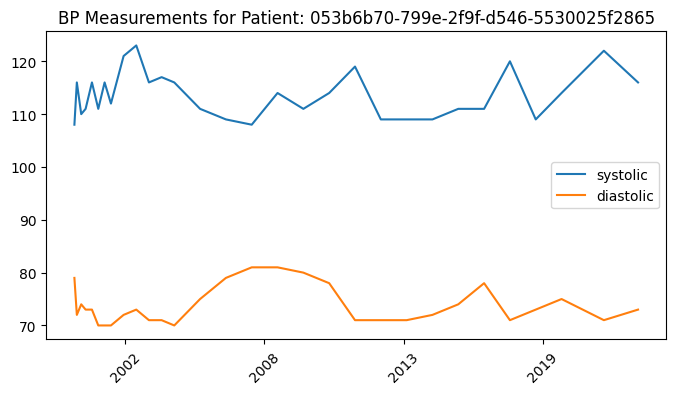

2004-12-26
2004-12-26 00:00:00


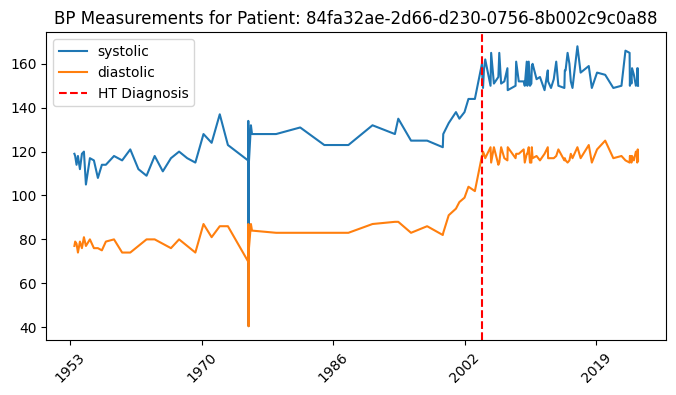

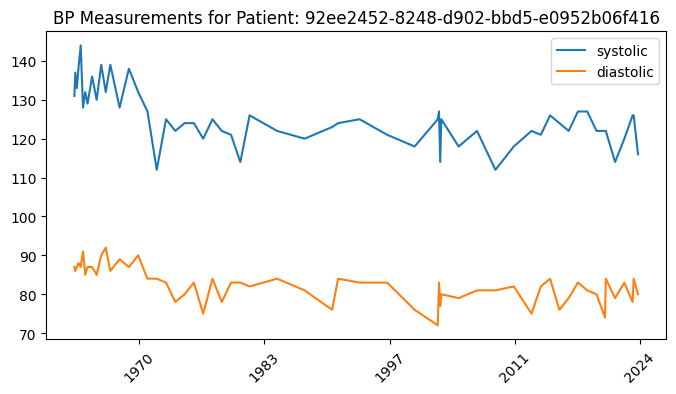

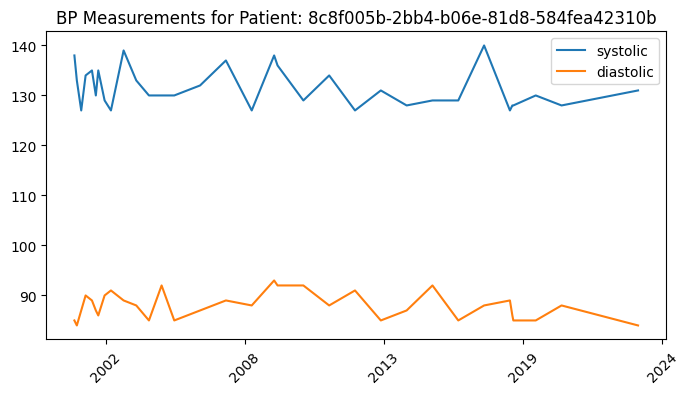

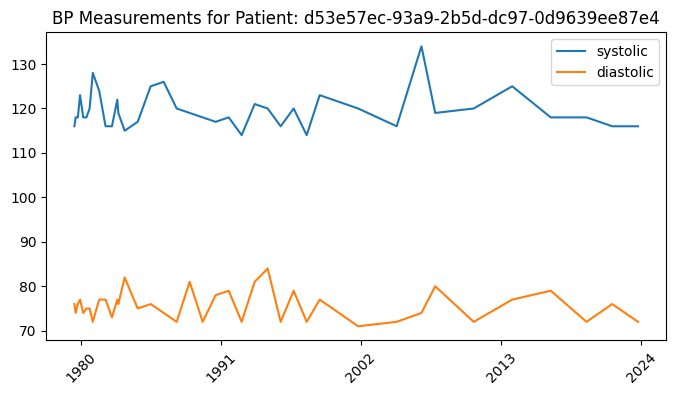

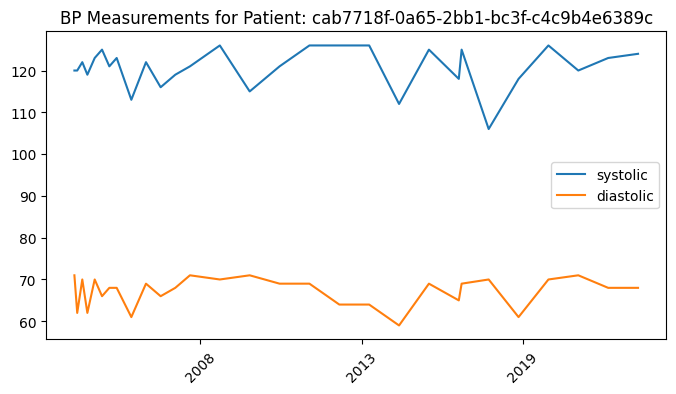

2016-09-19
2016-09-19 00:00:00


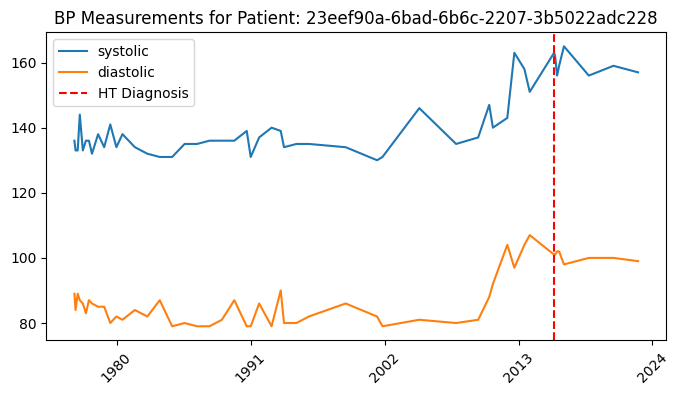

2007-05-11
2007-05-11 00:00:00


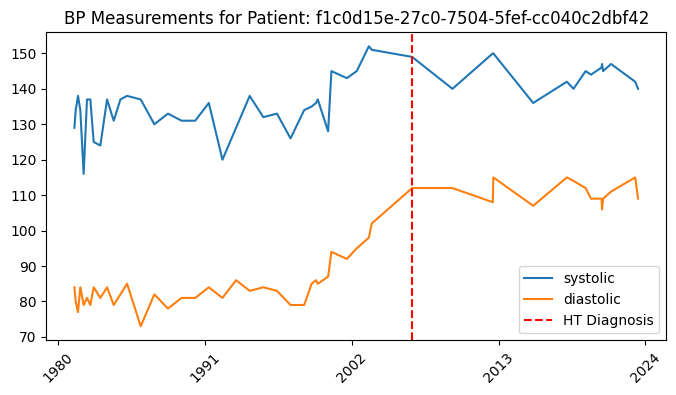

2004-04-25
2004-04-25 00:00:00


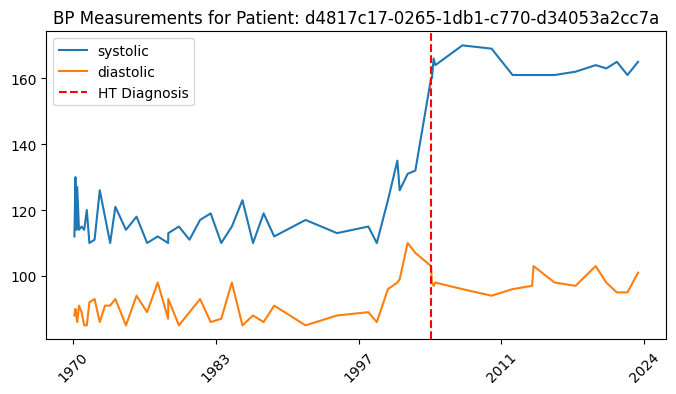

2012-09-15
2012-09-15 00:00:00


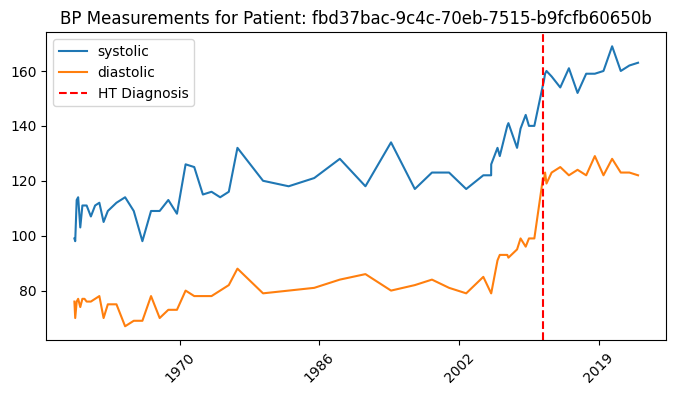

In [6]:
ht_patients = list(set(conds[conds["DESCRIPTION"] == "Essential hypertension (disorder)"]["PATIENT"]))
patients = list(set(conds["PATIENT"]))

# plot for first 10 patients
for pat in patients[:10]:
    plot_bp(pat, obs, conds, encounters)